<a href="https://colab.research.google.com/github/Bodige-vamshi913/Skill-craft-Technology-.House-price-prediction/blob/main/House_price_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET:
   SquareFeet  Bedrooms   Price
0         850         2  120000
1         900         2  130000
2        1000         3  150000
3        1200         3  170000
4        1500         3  210000
5        1600         4  230000
6        1700         4  250000
7        2000         4  300000
8        2200         5  330000
9        2500         5  360000


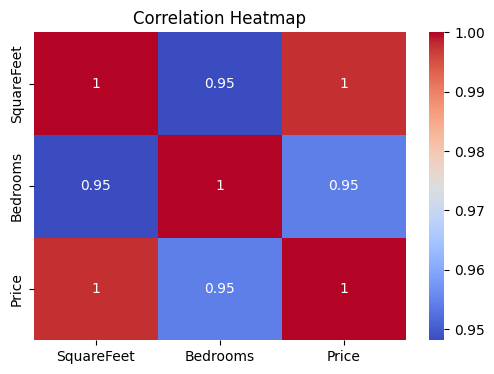


Training Samples: 8
Testing Samples: 2

MODEL PARAMETERS
Intercept: -8374.79935794539
Coefficients: [ 138.52327448 5222.71268058]

ACTUAL vs PREDICTED
Actual: [np.int64(330000), np.int64(130000)]
Predicted: [np.float64(322489.9678972713), np.float64(126741.57303370789)]

MODEL EVALUATION
MAE  : 5384.229534510421
MSE  : 33508964.239337858
RMSE : 5788.692791929613
R² Score: 0.9966491035760662


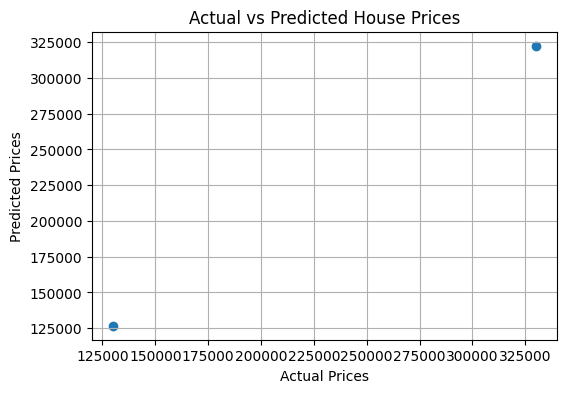


--- PREDICT NEW HOUSE PRICE ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = {
    "SquareFeet": [850, 900, 1000, 1200, 1500, 1600, 1700, 2000, 2200, 2500],
    "Bedrooms":   [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    "Price":      [120000, 130000, 150000, 170000, 210000, 230000, 250000, 300000, 330000, 360000]
}

df = pd.DataFrame(data)

print("DATASET:")
print(df)

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

X = df[['SquareFeet', 'Bedrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Samples:", len(X_train))
print("Testing Samples:", len(X_test))



model = LinearRegression()
model.fit(X_train, y_train)

print("\nMODEL PARAMETERS")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



y_pred = model.predict(X_test)

print("\nACTUAL vs PREDICTED")
print("Actual:", list(y_test.values))
print("Predicted:", list(y_pred))



mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("\nMODEL EVALUATION")
print(f"MAE  : {mae}")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"R² Score: {r2}")



plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()



print("\n--- PREDICT NEW HOUSE PRICE ---")
sqft = float(input("Enter Square Feet: "))
bed  = int(input("Enter Number of Bedrooms: "))

new_data = np.array([[sqft, bed]])
predicted_price = model.predict(new_data)

print(f"\nPredicted House Price: ₹{predicted_price[0]:,.2f}")
